In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import SVG, Image

!pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd # data processing
df=pd.read_csv('/content/drive/MyDrive/Facial_Expression/fer2013/fer2013.csv')
print(df.shape)
df.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [ ]:
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [ ]:
df['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

# **Class Distribution**

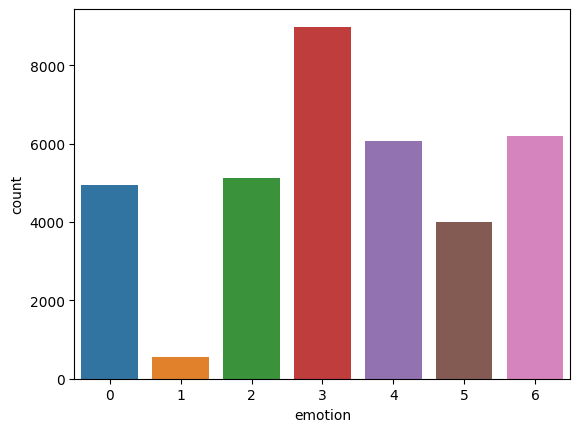

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=df['emotion'],label='Count')
plt.show()

[Text(0, 0, 'Angry'),
 Text(1, 0, 'Disgust'),
 Text(2, 0, 'Fear'),
 Text(3, 0, 'Happy'),
 Text(4, 0, 'Sad'),
 Text(5, 0, 'Surprise'),
 Text(6, 0, 'Neutral')]

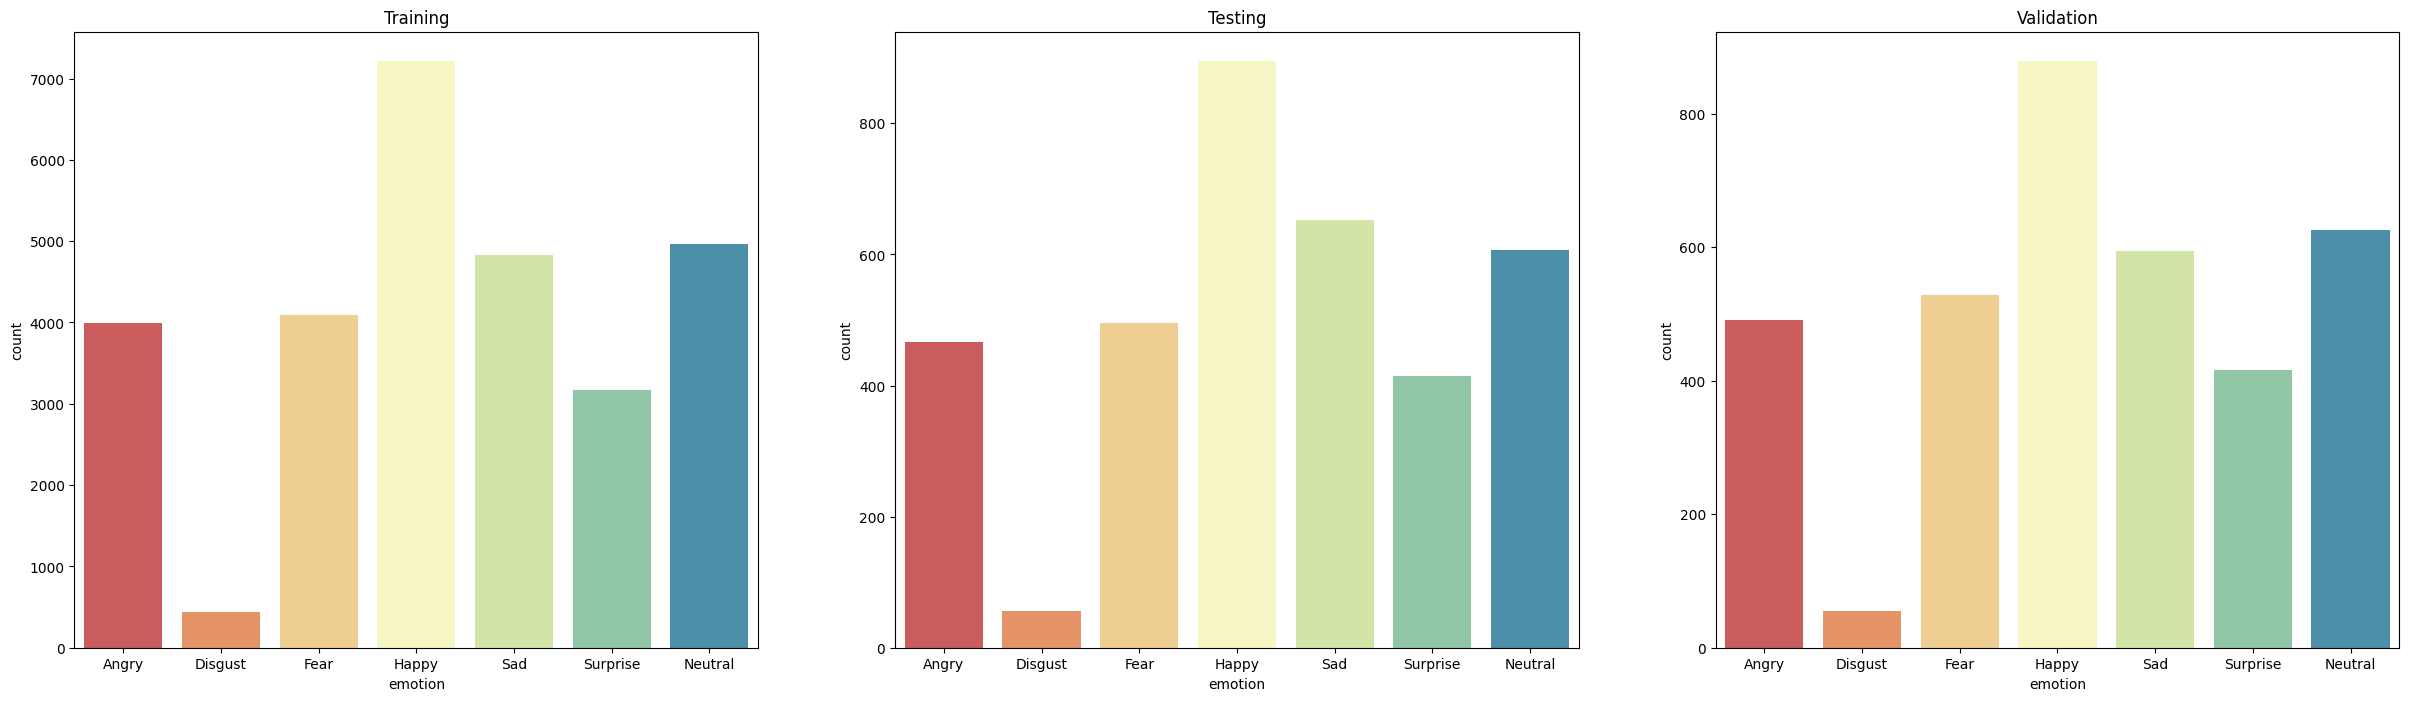

In [ ]:

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,8))

sns.countplot(data = df[df['Usage']=='Training'], x='emotion', ax=ax1, palette='Spectral').set_title('Training')
ax1.set_xticklabels(emotions.values())

sns.countplot(data = df[df['Usage']=='PublicTest'], x='emotion', ax=ax2, palette='Spectral').set_title('Testing')
ax2.set_xticklabels(emotions.values())

sns.countplot(data = df[df['Usage']=='PrivateTest'], x='emotion', ax=ax3, palette='Spectral').set_title('Validation')
ax3.set_xticklabels(emotions.values())

In [ ]:
len(df.pixels[0].split(' '))

2304

In [ ]:
import math
math.sqrt(len(df.pixels[0].split(' ')))

48.0

In [ ]:
import numpy as np
np.array(df.pixels.loc[0].split(" "))

array(['70', '80', '82', ..., '106', '109', '82'], dtype='<U3')

# **Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

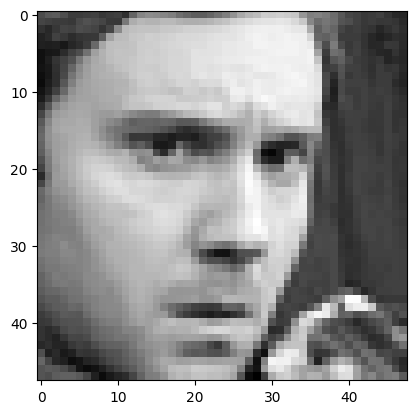

In [ ]:
plt.imshow(np.array(df.pixels.loc[0].split(" ")).reshape(48,48).astype('float'), cmap='gray')

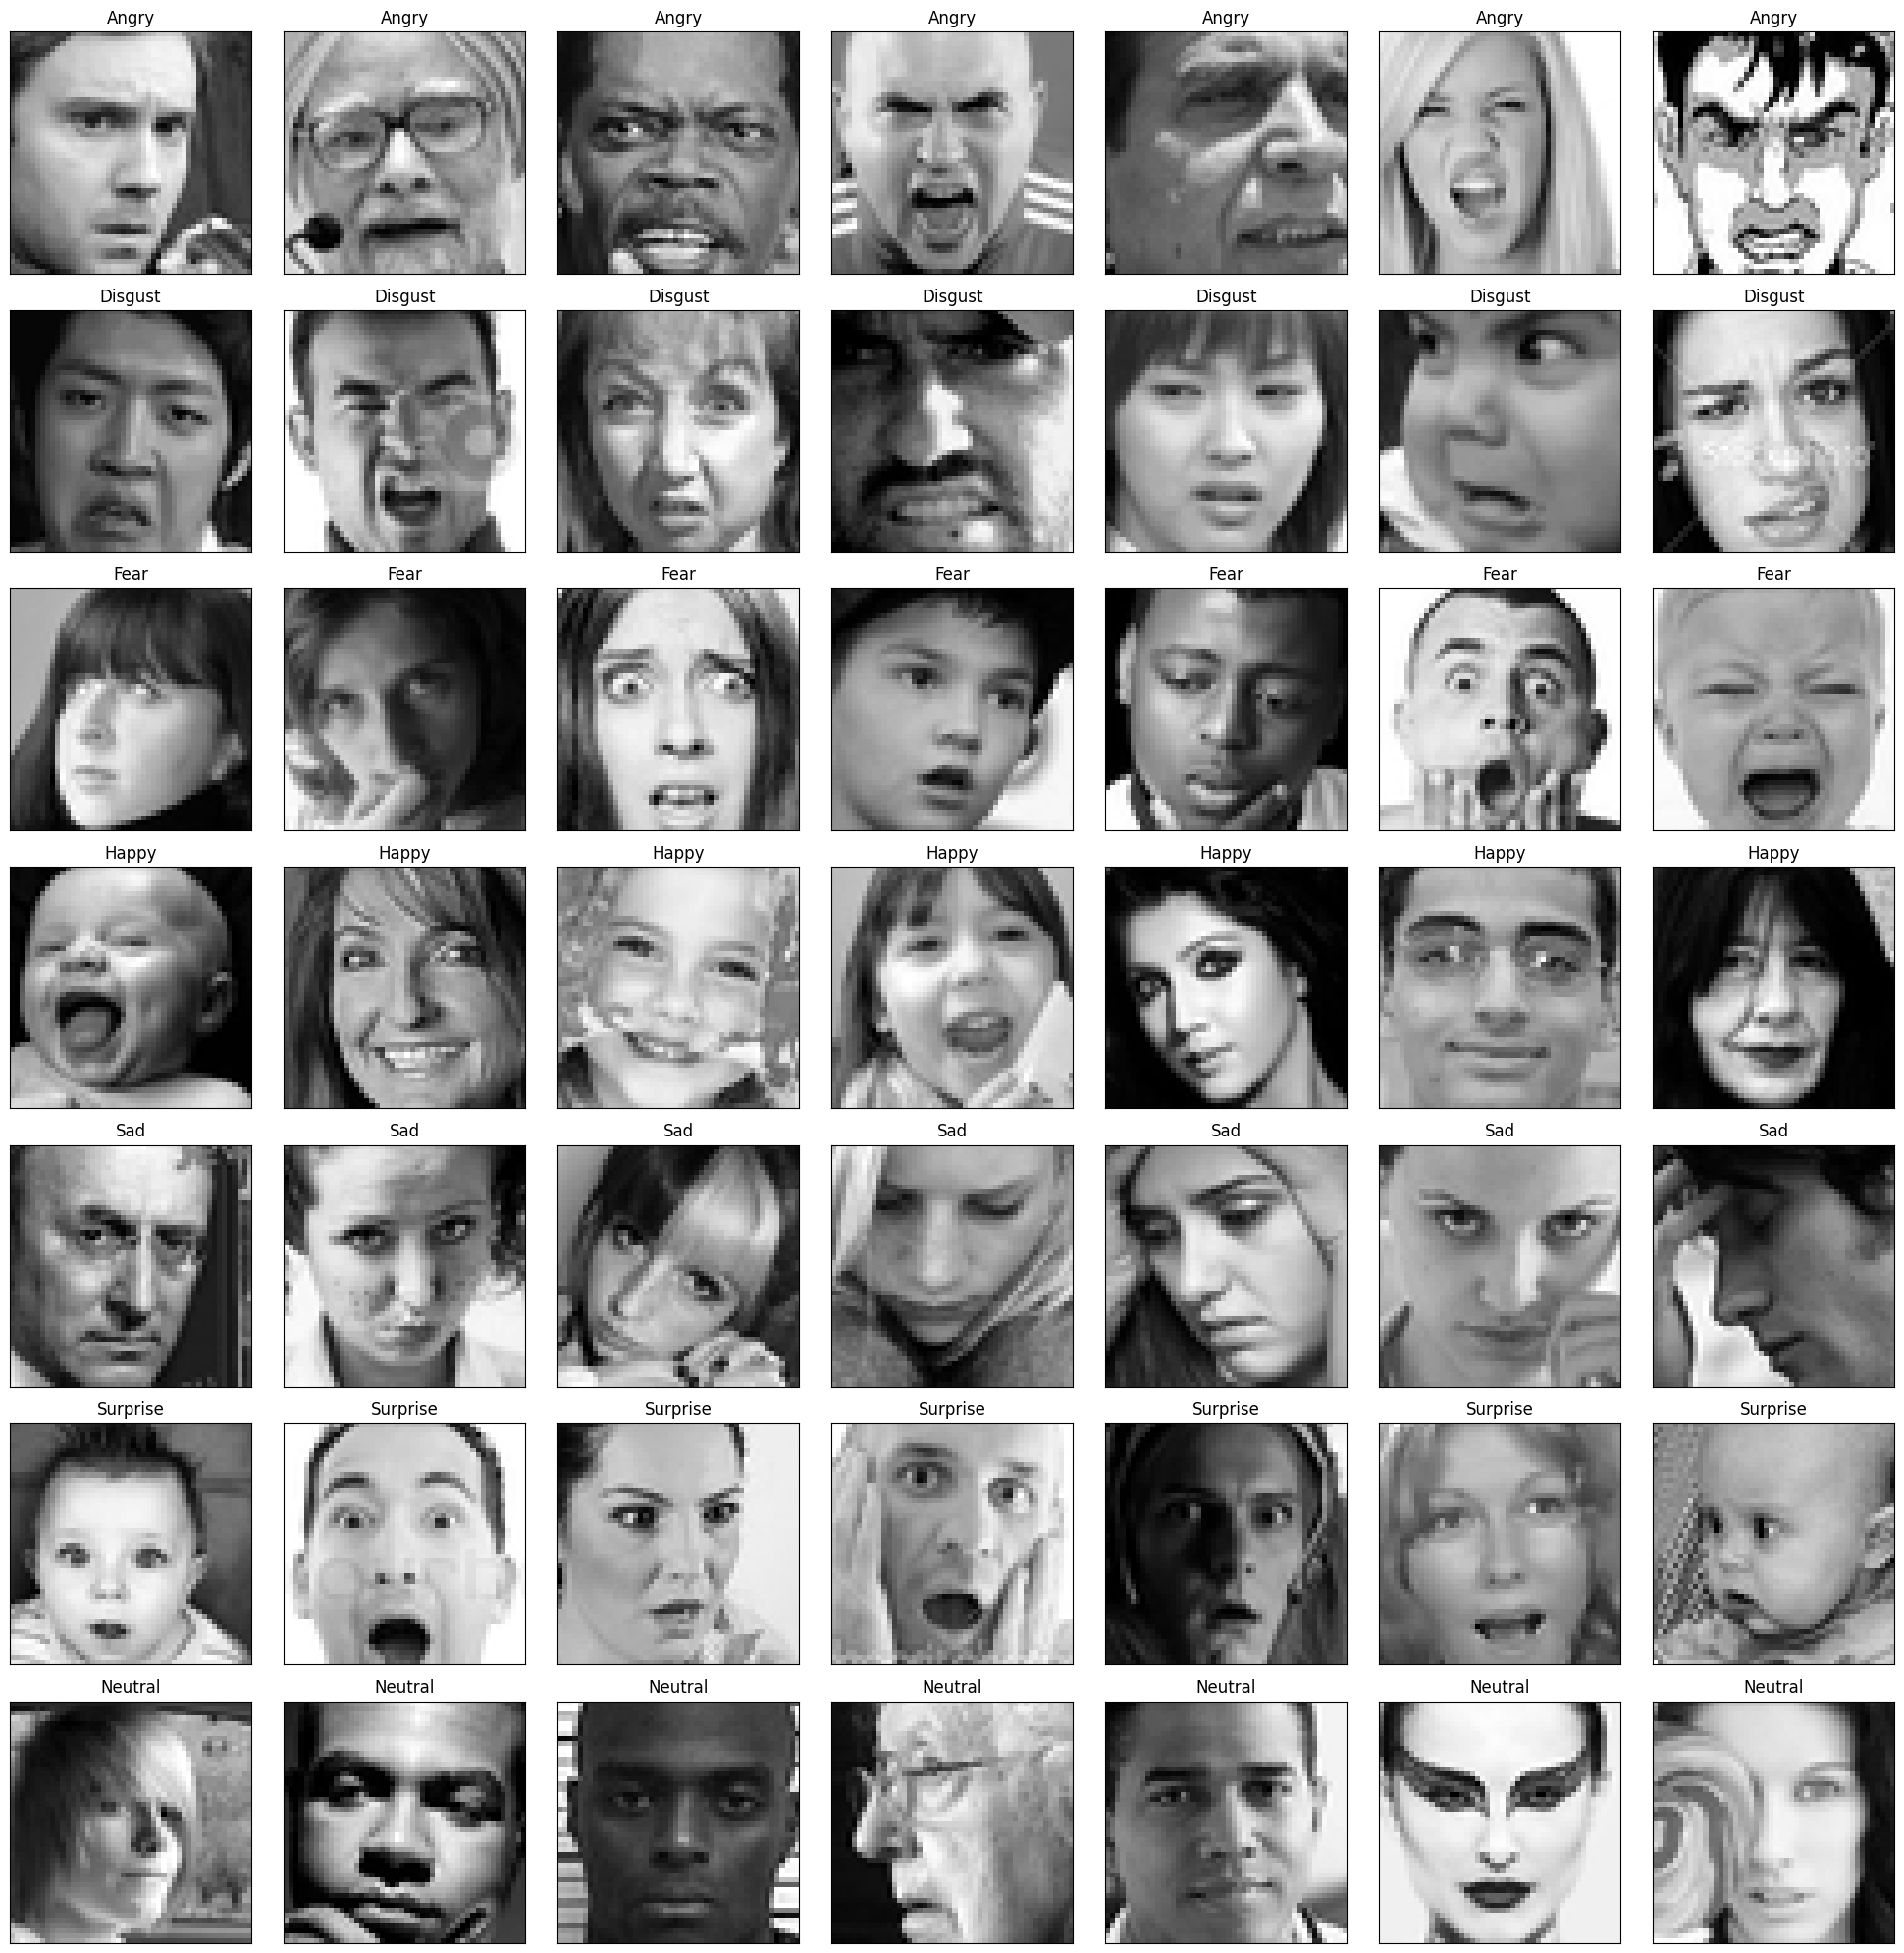

In [ ]:
fig = plt.figure(1, (20, 20))

k = 0
for label in sorted(df['emotion'].unique()):
    for j in range(7):
        px = df[df['emotion']==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotions[label])
        plt.tight_layout()

# **Prepare Train Set and Test Set**

**Train**

In [ ]:
train_data = df[df['Usage']=='Training']
train_data.drop(columns='Usage', inplace=True)
train_data.head()

<ipython-input-16-1de9ce48f1d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(columns='Usage', inplace=True)


,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
train_data['pixels'][0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [ ]:
def prepare_data(data):
    image_array = np.zeros(shape=(len(data), 48, 48, 1))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i, :, :, 0] = image / 255

    return image_array, image_label

In [ ]:
X_train, y_train = prepare_data(train_data)
print(X_train.shape, y_train.shape)

(28709, 48, 48, 1) (28709,)


**Test**

In [ ]:
test_data = df[df['Usage']!='Training']
test_data.drop(columns='Usage', inplace=True)
test_data.head()

#prepare data
X_test, y_test = prepare_data(test_data)
print(X_test.shape, y_test.shape)

<ipython-input-20-aedf4b1bdfe3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(columns='Usage', inplace=True)


(7178, 48, 48, 1) (7178,)


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import auc,roc_curve,roc_auc_score

Train Test Split

In [ ]:
#train val split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  shuffle=True,
                                                  stratify=y_train,
                                                  test_size=0.2,
                                                  random_state=121)

In [ ]:
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
import keras
import tensorflow.keras as keras

In [ ]:
#encode train labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = keras.utils.to_categorical(y_train)

#ecode test labels
y_test = le.transform(y_test)
y_test = keras.utils.to_categorical(y_test)

#ecode val labels
y_val = le.transform(y_val)
y_val = keras.utils.to_categorical(y_val)

print('y_train', y_train.shape)
print('y_test', y_test.shape)
print('y_val', y_val.shape)

y_train (22967, 7)
y_test (7178, 7)
y_val (5742, 7)


# **Data Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array

In [ ]:

img_size = 48
batch_size = 32

#use Image Data Generator to perform this task
#train set
datagen = ImageDataGenerator(rotation_range=25,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)

datagen.fit(X_train)
datagen.fit(X_val)

# **CNN Model**

In [ ]:
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

Tensorflow version: 2.12.0


In [ ]:
model = Sequential()

#1st conv
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1))) #1 is for grayscale
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd conv
model.add(Conv2D(128, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd conv
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th conv
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

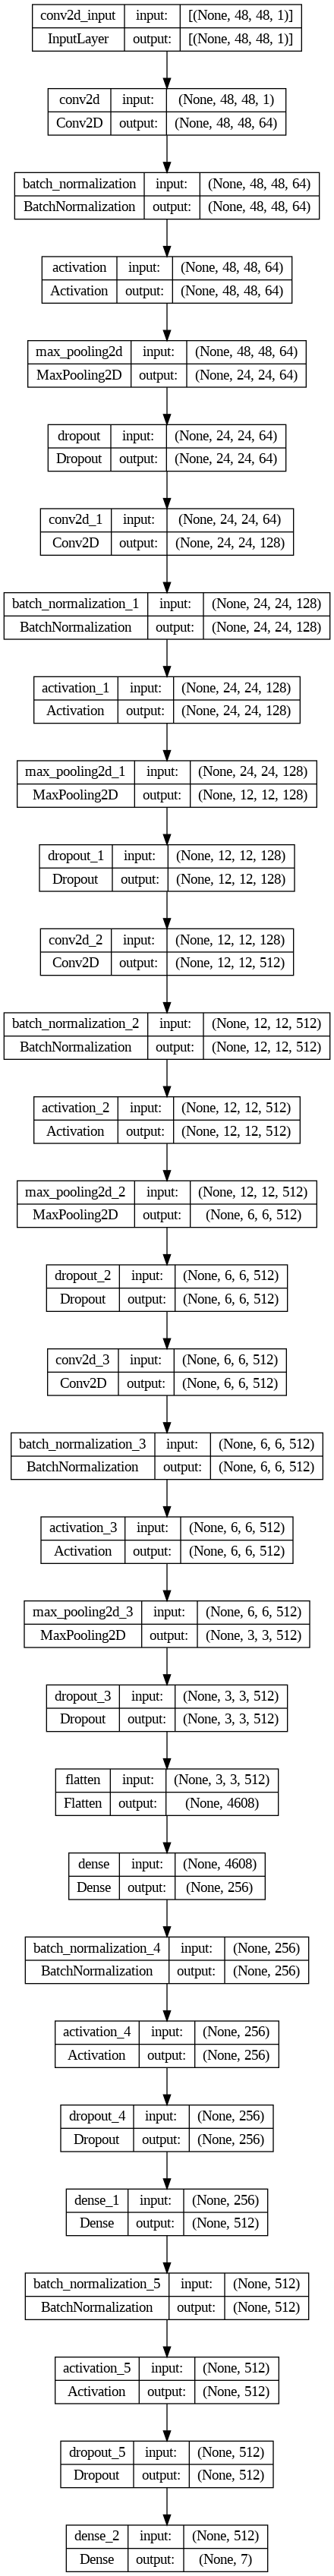

In [ ]:
#plot
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

# **Compile Model**

In [ ]:
#compile
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 1e-5),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

**Train model**

In [ ]:
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-of34yyk3
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-of34yyk3
  Resolved https://github.com/tensorflow/docs to commit 0c78d6d8ad6ced9178a081d41ead24ae80d88958
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=183245 sha256=b270f090e4d59f75b5e1ea2e848cef2da4e0f2b0cdf77d2e89b9f3026ba8f742
  Stored in directory: /tmp/pip-ephem-wheel-cache-1nyso474/wheels/fc/f8/3b/5d21409a59cb1be9b1ade11f682039ced75b84de9dd6a0c8de
Successfully built tensorflow-docs


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

In [ ]:
epochs = 100

#checkpoint to save best weights
checkpoint = ModelCheckpoint('model_weights.h5',
                             monitor='val_accuracy',
                             save_weights_only=True,
                             mode='max',
                             verbose=1)

#reduce learning rate if plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=2,
                              min_lr=0.00001,
                              mode='min')

#stop training if accuracy does not improve
earlystop = EarlyStopping(monitor='val_accuracy',
                          patience=5,
                          mode='max',
                          verbose=1)

#define callbacks
callbacks = [tfdocs.modeling.EpochDots(),
             earlystop,
             checkpoint,
             reduce_lr]

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=epochs,
                    callbacks=callbacks)

Epoch 1/100
718/717 [==============================] - ETA: 0s - loss: 2.2372 - accuracy: 0.1734
Epoch: 0, accuracy:0.1734,  loss:2.2372,  val_accuracy:0.1958,  val_loss:1.9463,  
.
Epoch 1: saving model to model_weights.h5
717/717 [==============================] - 42s 28ms/step - loss: 2.2372 - accuracy: 0.1734 - val_loss: 1.9463 - val_accuracy: 0.1958 - lr: 1.0000e-05
Epoch 2/100
717/717 [============================>.] - ETA: 0s - loss: 2.0652 - accuracy: 0.2167.
Epoch 2: saving model to model_weights.h5
717/717 [==============================] - 17s 23ms/step - loss: 2.0651 - accuracy: 0.2166 - val_loss: 1.8240 - val_accuracy: 0.2673 - lr: 1.0000e-05
Epoch 3/100
717/717 [============================>.] - ETA: 0s - loss: 2.0001 - accuracy: 0.2391.
Epoch 3: saving model to model_weights.h5
717/717 [==============================] - 17s 23ms/step - loss: 1.9997 - accuracy: 0.2392 - val_loss: 1.8018 - val_accuracy: 0.2654 - lr: 1.0000e-05
Epoch 4/100
718/717 [=========================

# **Evaluate Model**

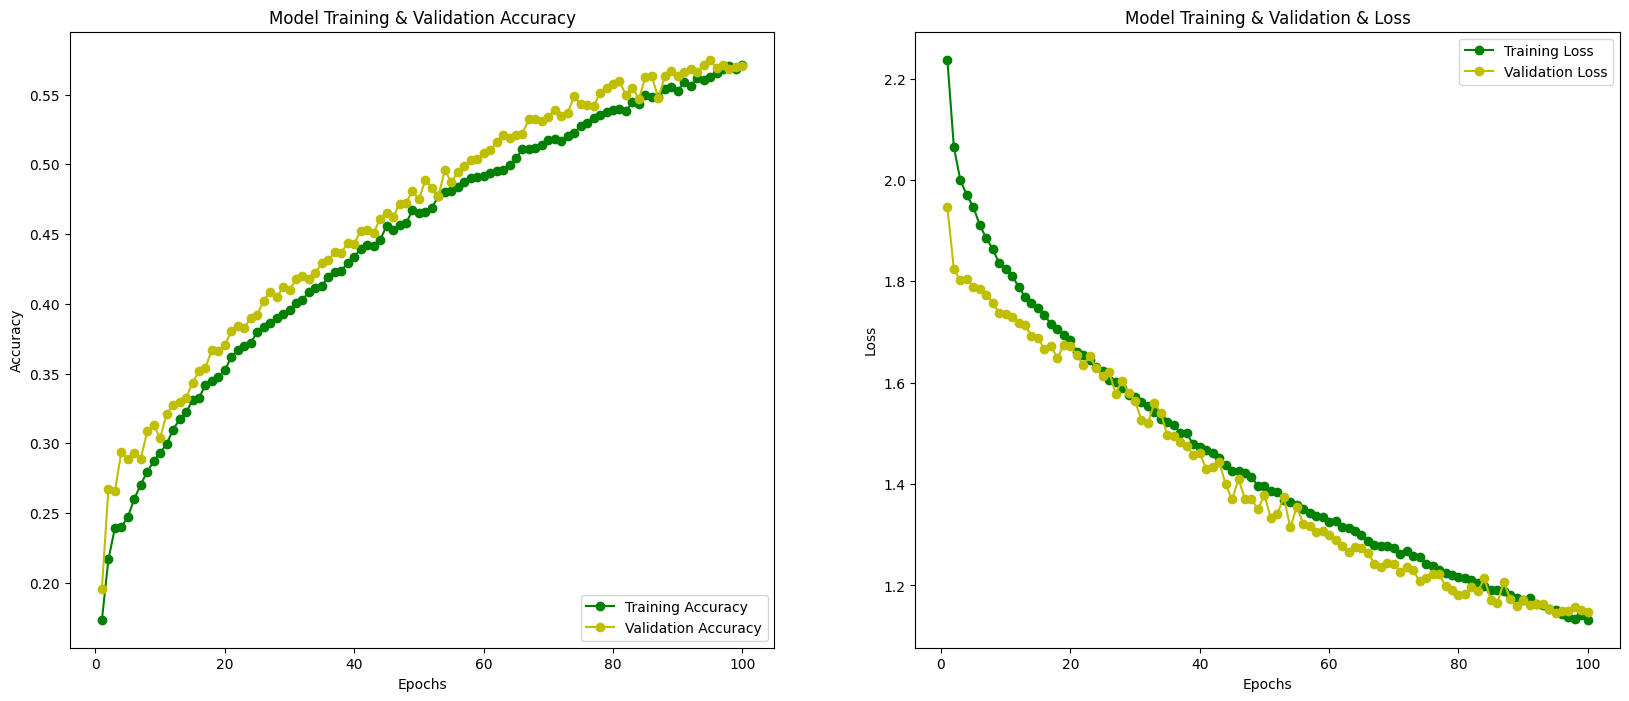

In [ ]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20, 8)

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs , train_acc , 'g-o' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'y-o' , label = 'Validation Accuracy')
ax[0].set_title('Model Training & Validation Accuracy')
ax[0].legend(loc = 'lower right')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'y-o' , label = 'Validation Loss')
ax[1].set_title('Model Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [ ]:
#make prediction
y_test = np.argmax(y_test, axis=1)
yhat_test = np.argmax(model.predict(X_test), axis=1)

225/225 [==============================] - 2s 7ms/step


# **Confusion Matrix**

[[ 394   35   49   98  191   48  143]
 [  18   53    6   10    8    4   12]
 [  91   19  211  109  261  184  149]
 [  31    5   26 1473   93   51   95]
 [ 119   19   71  136  593   40  269]
 [  21    2   30   55   25  652   46]
 [  90   12   39  155  201   34  702]]


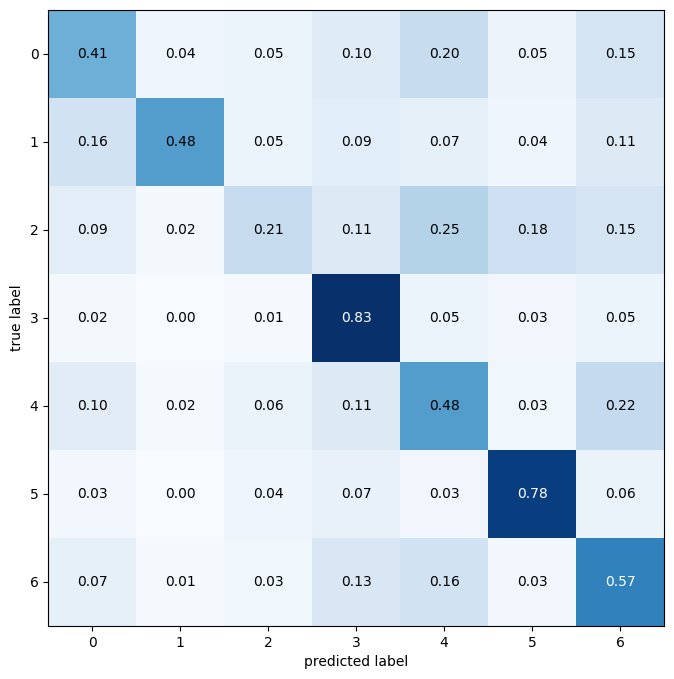

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import auc,roc_curve,roc_auc_score

from mlxtend.plotting import plot_confusion_matrix


#get confusion matrix
cm = confusion_matrix(y_test, yhat_test)
print(cm)

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                show_absolute=False,

                                figsize=(8, 8))
fig.show()

# **Classification Report**

In [ ]:
#get classification report
print(classification_report(y_test, yhat_test, target_names=emotions.values()))

              precision    recall  f1-score   support

       Angry       0.52      0.41      0.46       958
     Disgust       0.37      0.48      0.41       111
        Fear       0.49      0.21      0.29      1024
       Happy       0.72      0.83      0.77      1774
         Sad       0.43      0.48      0.45      1247
    Surprise       0.64      0.78      0.71       831
     Neutral       0.50      0.57      0.53      1233

    accuracy                           0.57      7178
   macro avg       0.52      0.54      0.52      7178
weighted avg       0.56      0.57      0.55      7178



# **Make Predictions**

1/1 [==============================] - 0s 21ms/step


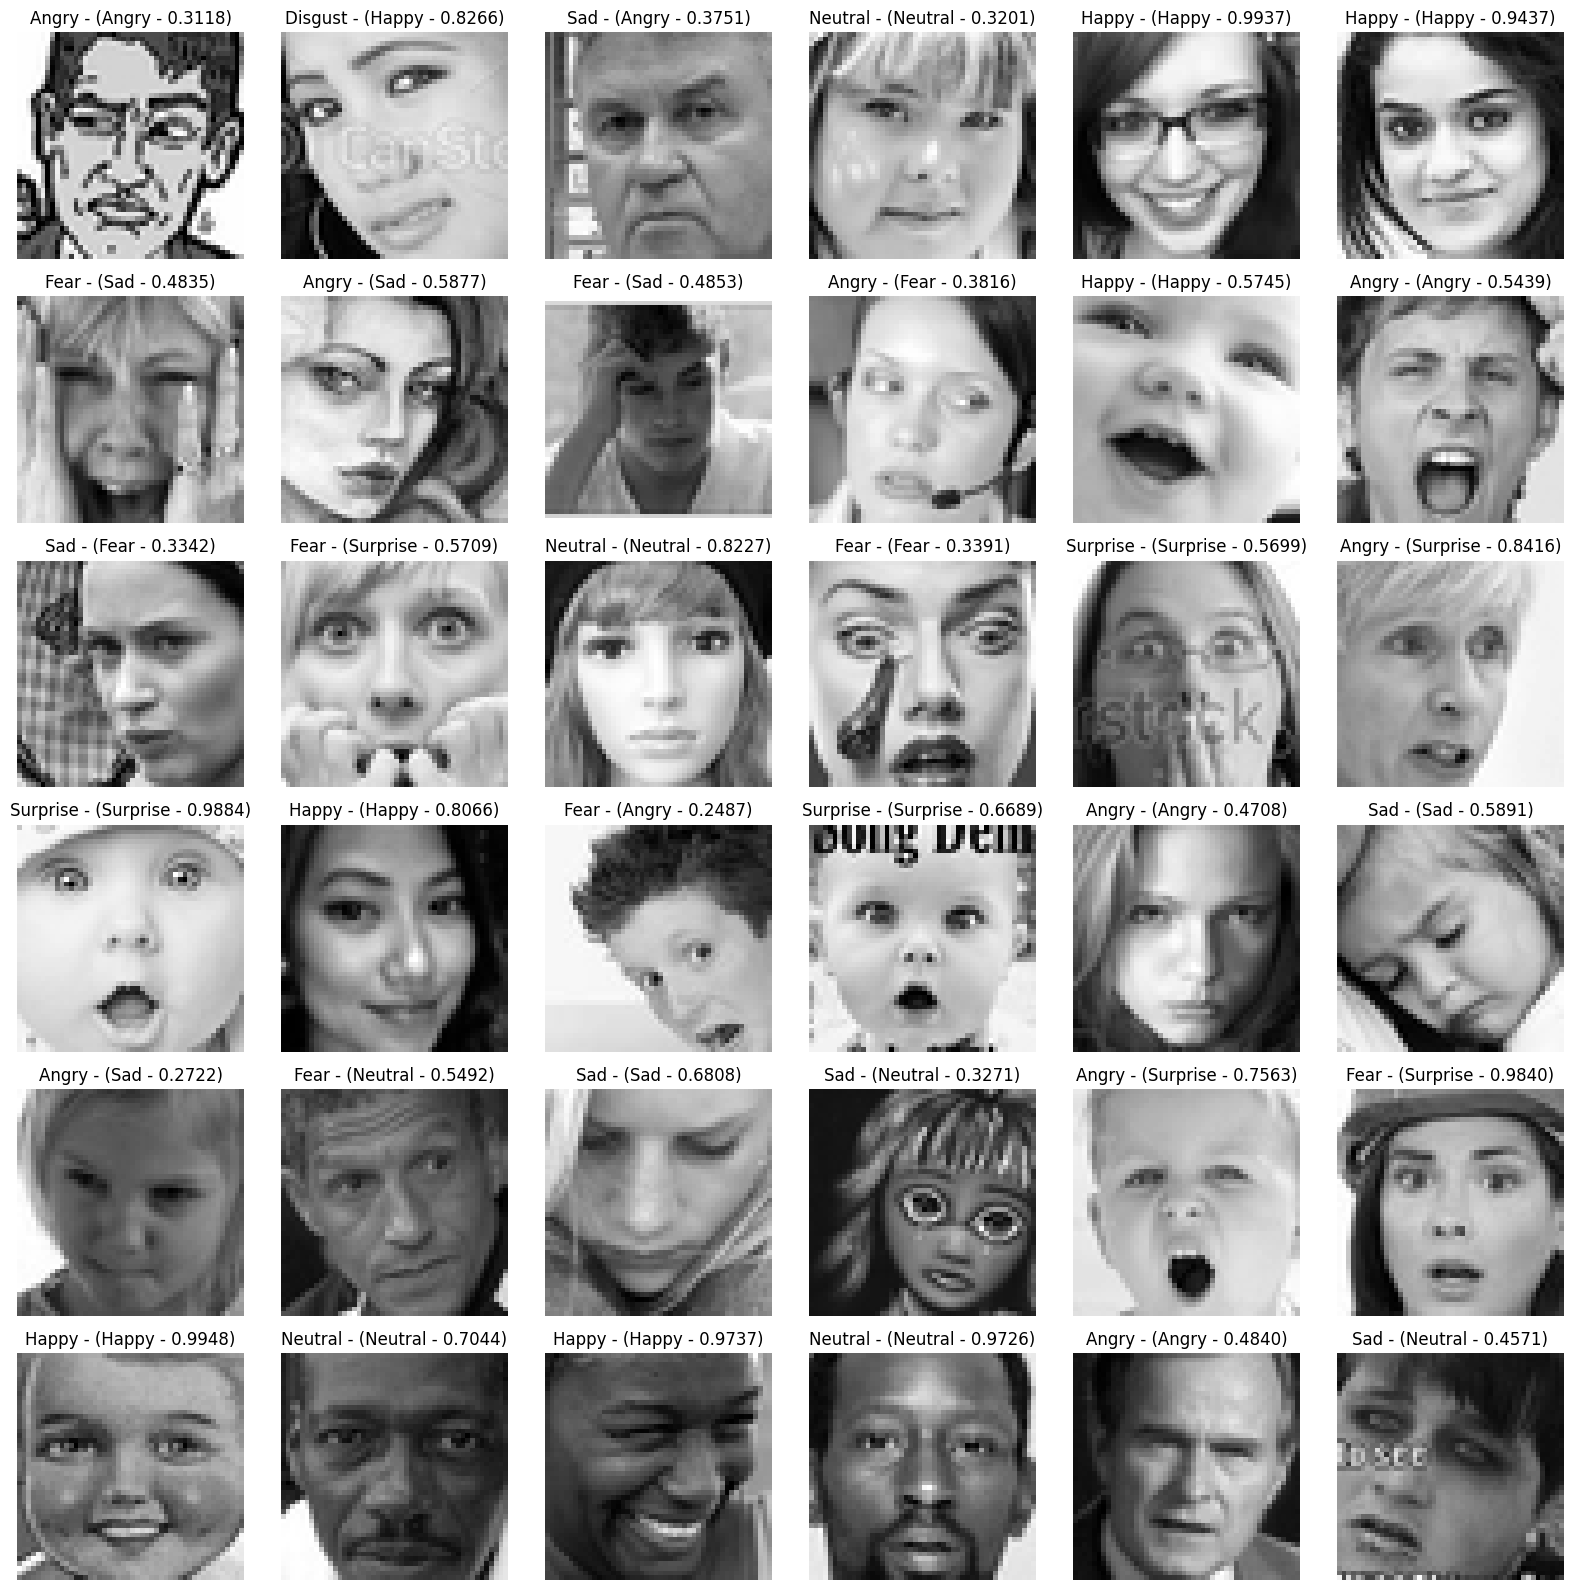

In [ ]:
plt.figure(figsize=[16,16])

for i in range(36):
    img = X_test[i,:,:,0]
    p_dist = model.predict(img.reshape(1, 48, 48, 1))
    k = np.argmax(p_dist)
    p = np.max(p_dist)

    plt.subplot(6, 6, i+1)
    plt.imshow(img, cmap='binary_r')
    plt.title(f'{emotions[y_test[i]]} - ({emotions[k]} - {p:.4f})')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Grad-CAM**

In [ ]:
import cv2
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        for layer in reversed(self.model.layers):
            if len(layer.output_shape) == 4:
                return layer.name
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output,self.model.output]
       )

        with tf.GradientTape() as tape:
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]
            grads = tape.gradient(loss, convOutputs)

            castConvOutputs = tf.cast(convOutputs > 0, "float32")
            castGrads = tf.cast(grads > 0, "float32")
            guidedGrads = castConvOutputs * castGrads * grads
            convOutputs = convOutputs[0]
            guidedGrads = guidedGrads[0]

            weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
            cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

            (w, h) = (image.shape[2], image.shape[1])
            heatmap = cv2.resize(cam.numpy(), (w, h))
            numer = heatmap - np.min(heatmap)
            denom = (heatmap.max() - heatmap.min()) + eps
            heatmap = numer / denom
            heatmap = (heatmap * 255).astype("uint8")
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap = cv2.COLORMAP_VIRIDIS):
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        return (heatmap, output)

1/1 [==============================] - 0s 18ms/step


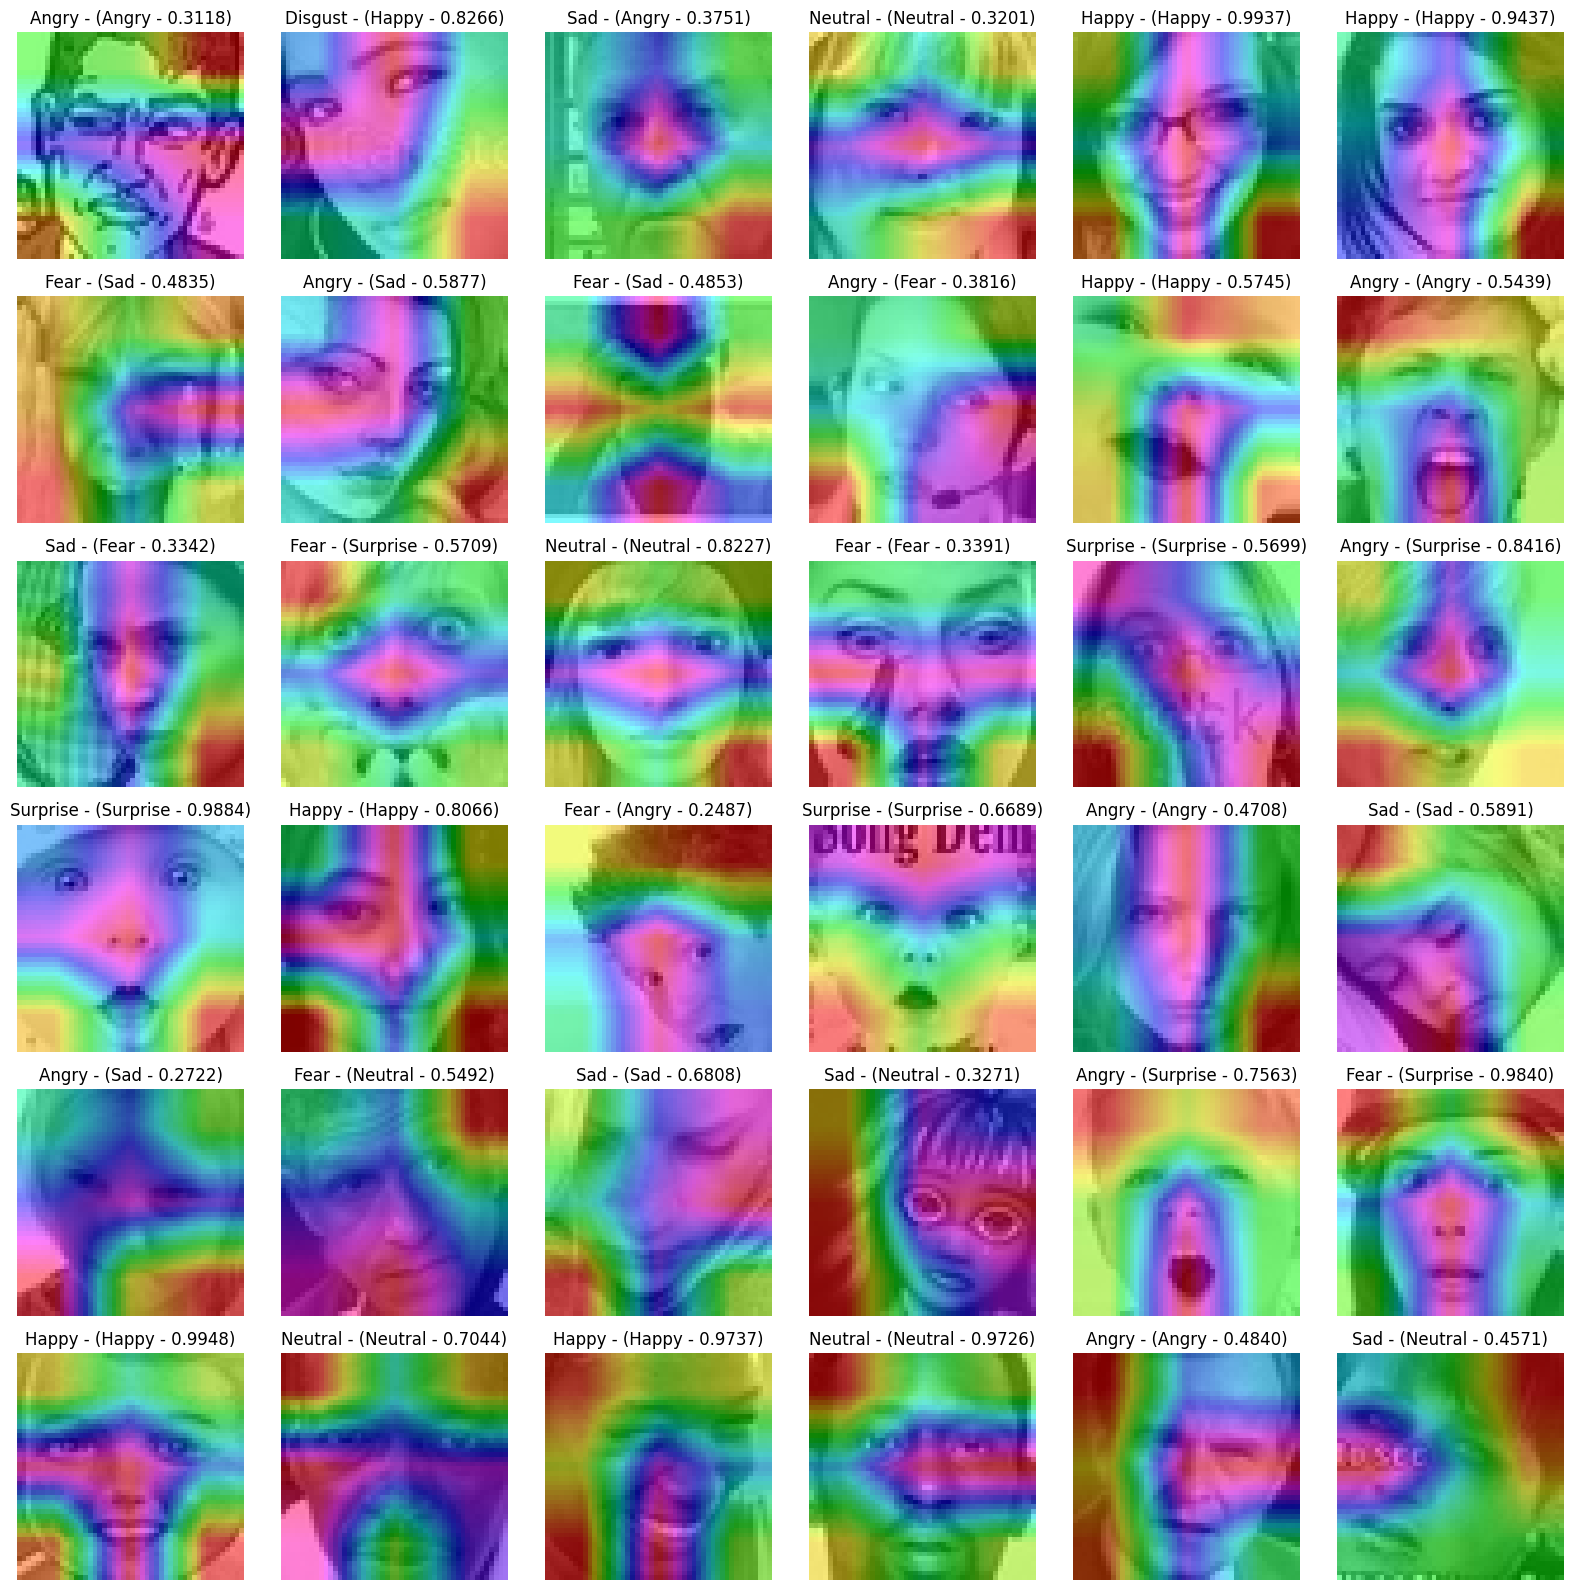

In [ ]:
plt.figure(figsize=[16,16])
for i in range(36):
    img = X_test[i,:,:,0]
    p_dist = model.predict(img.reshape(1, 48, 48, 1))
    k = np.argmax(p_dist)
    p = np.max(p_dist)

    cam = GradCAM(model, k)
    heatmap = cam.compute_heatmap(img.reshape(1, 48, 48, 1))

    plt.subplot(6, 6, i+1)
    plt.imshow(img, cmap='binary_r')
    plt.imshow(heatmap, alpha=0.5, cmap='hsv')
    plt.title(f'{emotions[y_test[i]]} - ({emotions[k]} - {p:.4f})')
    plt.axis('off')

plt.tight_layout()
plt.show()

225/225 [==============================] - 1s 5ms/step


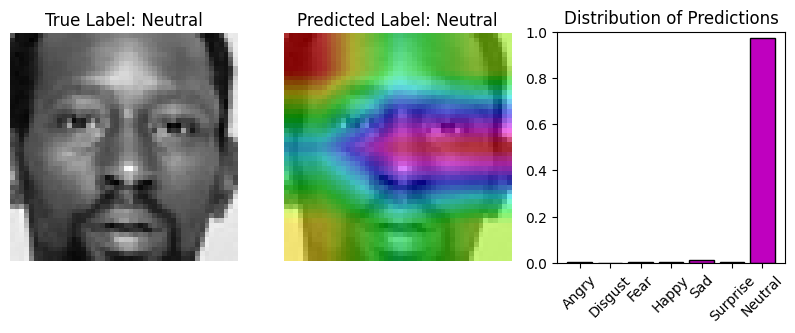

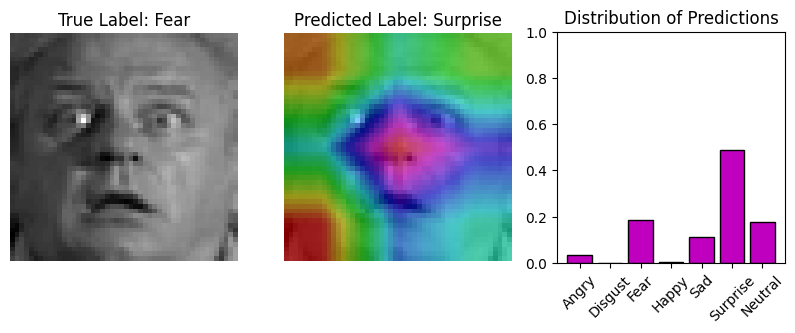

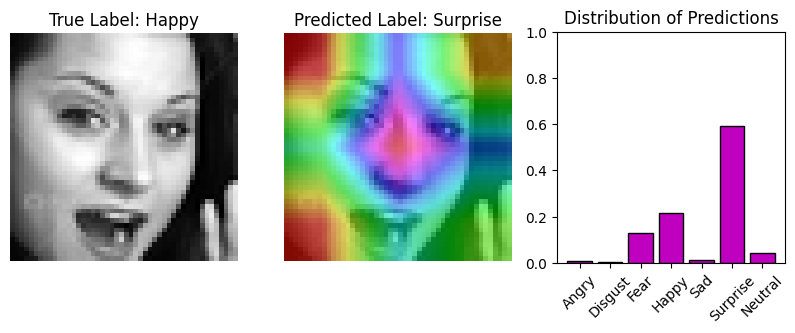

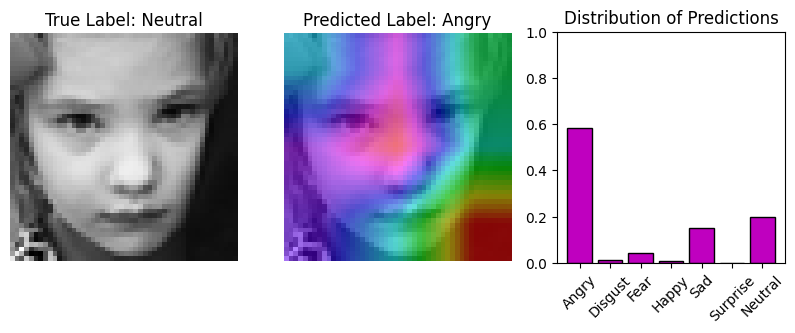

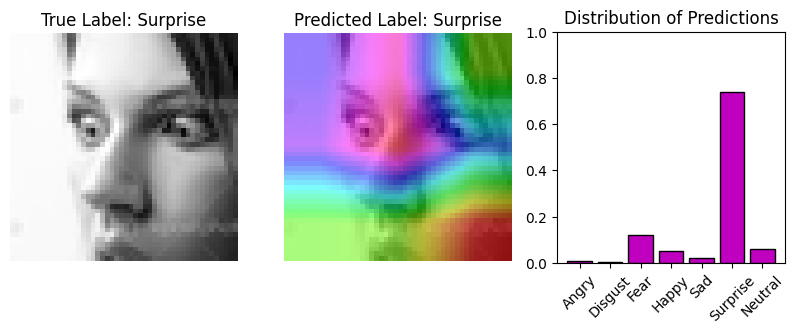

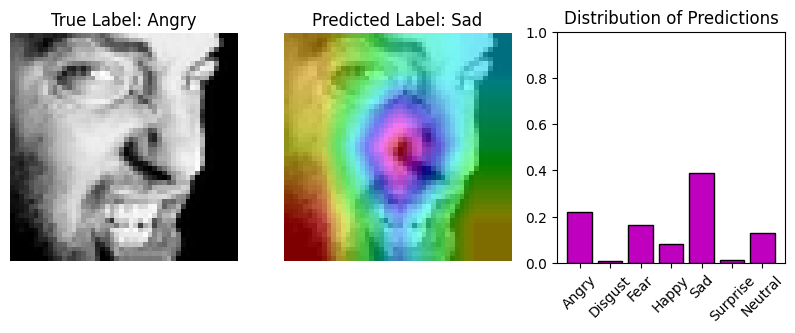

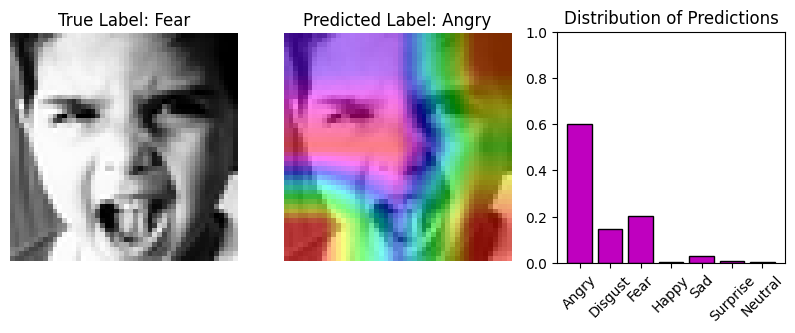

In [ ]:
test_prob = model.predict(X_test)
test_pred = np.argmax(test_prob, axis=1)

sel_imgs = [33, 1000, 88, 777, 108, 111, 7000]

for n in sel_imgs:
    img = X_test[n,:,:,0]

    plt.figure(figsize=[10,3])
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='binary_r')
    plt.title(f'True Label: {emotions[y_test[n]]}')
    plt.axis('off')

    cam = GradCAM(model, test_pred[n])
    heatmap = cam.compute_heatmap(img.reshape(1,48,48,1))

    plt.subplot(1, 3, 2)
    plt.imshow(img, cmap='binary_r')
    plt.imshow(heatmap, alpha=0.5, cmap='hsv')
    plt.title(f'Predicted Label: {emotions[test_pred[n]]}')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.bar(emotions.values(), test_prob[n, :], color='m', edgecolor='k')
    plt.xticks(rotation=45)
    plt.ylim([0,1])
    plt.title('Distribution of Predictions')
    plt.show()

# **Save Model as Json String**

In [ ]:
model_json = model.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_json)

model.save('model.h5')

# **Detect Faces on Live Video**

In [ ]:
from tensorflow.keras.models import model_from_json
import numpy as np
import tensorflow as tf

class FacialExpressionModel(object):

  EMOTIONS_LIST = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

  def__init__(self, model_json_file, model_weights_file):
    with open(model_json_file, 'r' as json_file):
      loaded_model_json = json_file.read()
      self.loaded = model_from_json(loaded_model_json)

      self.loaded_model.load_weights(model_weights_file)
      self.loaded_model._make_predict_function()

  def predict_emotion(self, img):
    self.preds = self.loaded_model.predict(img)
    return FacialExpressionModel.EMOTIONS_LIST[np.argmax(self.preds)]

SyntaxError: ignored

**class VideoCamera**

In [ ]:
import cv2
from model import FacialExpressionModel
import numpy as np

facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
model = FacialExpressionModel("model.json", "model_weights.h5")
font = cv2.FONT_HERSHEY_SIMPLEX

class VideoCamera(object):
    def __init__(self):
        self.video = cv2.VideoCapture("/home/rhyme/Desktop/Project/videos/facial_exp.mkv")

    def __del__(self):
        self.video.release()

    # returns camera frames along with bounding boxes and predictions
    def get_frame(self):
        _, fr = self.video.read()
        gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
        faces = facec.detectMultiScale(gray_fr, 1.3, 5)

        for (x, y, w, h) in faces:
            fc = gray_fr[y:y+h, x:x+w]

            roi = cv2.resize(fc, (48, 48))
            pred = model.predict_emotion(roi[np.newaxis, :, :, np.newaxis])

            cv2.putText(fr, pred, (x, y), font, 1, (255, 255, 0), 2)
            cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)

        _, jpeg = cv2.imencode('.jpg', fr)
        return jpeg.tobytes()